In [ ]:
%autosave 10

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [14]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

c1_data=pd.read_csv("cleaned_data.csv")

c1_data.isnull().sum()

#X = df['EDUCATION'][0:10].values.reshape(-1,1)

X=c1_data['EDUCATION'].values.reshape(-1,1)
y=c1_data['default payment next month']#[0:10].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=24)

X1=c1_data['LIMIT_BAL'].values.reshape(-1,1)
y1=c1_data['default payment next month']
X1_train, X1_test, y1_train, y1_test=train_test_split(X1,y1,test_size=0.2,random_state=24)




In [79]:
pre=log_model.predict_proba(X_test)
pre=pre[:,1]
pre1=log1_model.predict_proba(x_test)
pre1=pre1[:,1]

In [80]:
from sklearn.metrics import roc_auc_score
log_roc_auc=roc_auc_score(y_test,pre)
log_roc_auc1=roc_auc_score(Y_test,pre1)


In [10]:
import numpy as np
X=np.array(X)
X=X.reshape(-1, 1)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

model1=LogisticRegression()
model1.fit(X1_train, y1_train)

C:\Users\madhumugi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\madhumugi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [16]:
pre1=model.predict_proba(X_test)

pre2=model1.predict_proba(X1_test)

In [17]:
pre1=pre1[:,1]

pre2=pre2[:,1]

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc1=roc_auc_score(y_test,pre1)
log_roc_auc2=roc_auc_score(y1_test,pre2)

#fpr,tpr,thresholds=roc_curve(Y_test,pre1)
#from matplotlib import pyplot
#pyplot.plot(fpr,tpr,marker='.',label='logistic')

In [31]:
print(log_roc_auc1)
print(log_roc_auc2)

0.5434650477972642
0.6201990844642832


_________________________________________________________________________
**Now, plot the ROC curve.**


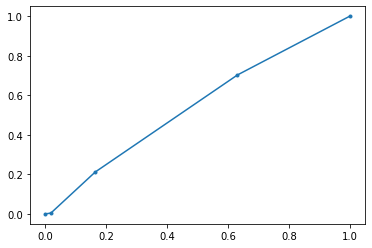

In [21]:
fpr,tpr,thresholds=roc_curve(y_test,pre1)
from matplotlib import pyplot
pyplot.plot(fpr,tpr,marker='.',label='logistic')

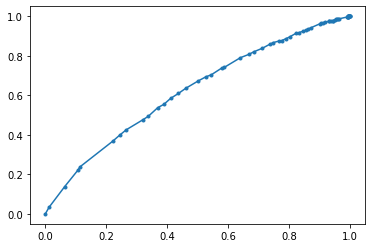

In [22]:
fpr,tpr,thresholds=roc_curve(y1_test,pre2)
pyplot.plot(fpr,tpr,marker='.',label='logistic')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [23]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y1_test,pre2)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0, 0.5, 'precision')

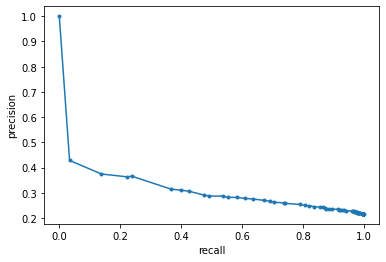

In [24]:
pyplot.plot(recall,precision,marker='.',label='pre_re')
pyplot.xlabel("recall")
pyplot.ylabel("precision")


_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [25]:
from sklearn.metrics import average_precision_score
avg_pre=average_precision_score(y1_test,pre2)
avg_pre

0.29824891448211244

In [26]:
from sklearn.metrics import auc
auc(recall,precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [27]:
pre22=model1.predict_proba(X1_train)
pre22=pre22[:,1]

In [33]:
log_roc_auc222=roc_auc_score(y1_train,pre22)

In [29]:
log_roc_auc222

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?


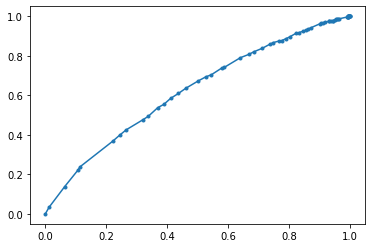

In [44]:
# first we calculat ROC AUC test data it is 0.01 greater than ROC AUC of train data.
fpr,tpr,thresholds=roc_curve(y1_test,pre2)
pyplot.plot(fpr,tpr,marker='.',label='logistic')



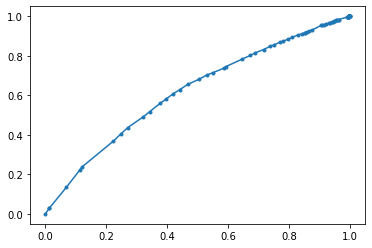

In [35]:
fpr,tpr,thresholds=roc_curve(y1_train,pre22)
pyplot.plot(fpr,tpr,marker='.',label='logistic')